# Network Traffic Analysis – Brute Force Attack Detection (EDA)

This project explores the CIC-IDS style network flow dataset containing Benign traffic and two brute-force attack classes: **FTP-Patator** and **SSH-Patator**.  
The goal is to understand how these attacks differ from normal traffic by analyzing flow duration, packet counts, inter-arrival times, and other network-level features.

### **Objectives**
- Explore the dataset using descriptive statistics and visualizations  
- Compare Benign vs. Attack behavior  
- Identify patterns that characterize brute-force attempts  
- Build insights useful for intrusion detection and cybersecurity analytics  

### **Dataset Classes**
- **Benign** – normal network traffic  
- **FTP-Patator** – brute-force login attempts over FTP  
- **SSH-Patator** – brute-force login attempts over SSH  

This EDA forms the foundation for later building ML models for intrusion detection.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', 200)
sns.set(style="whitegrid")

print("Libraries ready ✅")

Libraries ready ✅


In [2]:
file_path = "../data/Bruteforce-Tuesday-no-metadata.parquet"
df = pd.read_parquet(file_path)
print("Loaded. Shape:", df.shape)

Loaded. Shape: (389714, 78)


In [3]:
# Create a 10k sample from the big dataframe, save for later use.
import gc

n = 10000
sample = df.sample(n=min(n, len(df)), random_state=42)
print("Sample created shape:", sample.shape)

# save sample to data/ for portability
sample.to_parquet("../data/bruteforce_sample.parquet", index=False)
sample.to_csv("../data/bruteforce_sample.csv", index=False)
print("Saved sample to ../data/bruteforce_sample.parquet and .csv")

# free memory from the large df if you want
del df
gc.collect()
print("Original df deleted from memory to free RAM.")

Sample created shape: (10000, 78)
Saved sample to ../data/bruteforce_sample.parquet and .csv
Original df deleted from memory to free RAM.


In [4]:
# peek at the sample
import pandas as pd
sample.shape
display(sample.head(6))
print("\nColumns (first 80):")
print(sample.columns.tolist()[:80])

,Protocol,Flow Duration,Total Fwd Packets,Total Backward Packets,Fwd Packets Length Total,Bwd Packets Length Total,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,Bwd Packet Length Max,Bwd Packet Length Min,Bwd Packet Length Mean,Bwd Packet Length Std,Flow Bytes/s,Flow Packets/s,Flow IAT Mean,Flow IAT Std,Flow IAT Max,Flow IAT Min,Fwd IAT Total,Fwd IAT Mean,Fwd IAT Std,Fwd IAT Max,Fwd IAT Min,Bwd IAT Total,Bwd IAT Mean,Bwd IAT Std,Bwd IAT Max,Bwd IAT Min,Fwd PSH Flags,Bwd PSH Flags,Fwd URG Flags,Bwd URG Flags,Fwd Header Length,Bwd Header Length,Fwd Packets/s,Bwd Packets/s,Packet Length Min,Packet Length Max,Packet Length Mean,Packet Length Std,Packet Length Variance,FIN Flag Count,SYN Flag Count,RST Flag Count,PSH Flag Count,ACK Flag Count,URG Flag Count,CWE Flag Count,ECE Flag Count,Down/Up Ratio,Avg Packet Size,Avg Fwd Segment Size,Avg Bwd Segment Size,Fwd Avg Bytes/Bulk,Fwd Avg Packets/Bulk,Fwd Avg Bulk Rate,Bwd Avg Bytes/Bulk,Bwd Avg Packets/Bulk,Bwd Avg Bulk Rate,Subflow Fwd Packets,Subflow Fwd Bytes,Subflow Bwd Packets,Subflow Bwd Bytes,Init Fwd Win Bytes,Init Bwd Win Bytes,Fwd Act Data Packets,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
79733,6,199130,5,7,4019,736,3451,0,803.799988,1495.728760,564,0,105.14286,208.787308,23878.873100,60.262140,18102.726562,2.577910e+04,60055,3,107315,2.682875e+04,3.066756e+04,54438,216,146873,24478.833984,2.849927e+04,60943,3,0,0,0,0,112,152,25.109224,35.152916,0,3451,365.769226,947.760376,898249.687500,0,0,0,1,0,0,0,0,1,396.250000,803.799988,105.14286,0,0,0,0,0,0,5,4019,7,736,8192,73,3,20,0.0,0.0,0,0,0.0,0.0,0,0,Benign
224928,6,6058649,7,4,635,168,517,0,90.714287,190.707199,168,0,42.00000,84.000000,132.537798,1.815586,605864.875000,1.335487e+06,4046172,18,6058649,1.009775e+06,1.687253e+06,4123955,30,1975248,658416.000000,1.080686e+06,1905650,353,0,0,0,0,232,136,1.155373,0.660213,0,517,66.916664,150.848785,22755.355469,0,0,0,1,0,0,0,0,0,73.000000,90.714287,42.00000,0,0,0,0,0,0,7,635,4,168,29200,340,3,32,0.0,0.0,0,0,0.0,0.0,0,0,Benign
343486,17,980,2,2,96,148,48,48,48.000000,0.000000,74,74,74.00000,0.000000,248979.591800,4081.632653,326.666656,5.238953e+02,931,1,1,1.000000e+00,0.000000e+00,1,1,48,48.000000,0.000000e+00,48,48,0,0,0,0,40,40,2040.816284,2040.816284,48,74,58.400002,14.240787,202.800003,0,0,0,0,0,0,0,0,1,73.000000,48.000000,74.00000,0,0,0,0,0,0,2,96,2,148,-1,-1,1,20,0.0,0.0,0,0,0.0,0.0,0,0,Benign
5908,6,3548122,5,1,123,46,46,0,24.600000,23.276598,46,46,46.00000,0.000000,47.630831,1.691035,709624.375000,1.556792e+06,3494233,34,3548122,8.870305e+05,1.738290e+06,3494233,34,0,0.000000,0.000000e+00,0,0,1,0,0,0,160,32,1.409196,0.281839,0,46,30.714285,21.684975,470.238098,0,1,0,0,1,0,0,0,0,35.833332,24.600000,46.00000,0,0,0,0,0,0,5,123,1,46,342,114,2,32,0.0,0.0,0,0,0.0,0.0,0,0,Benign
89612,6,121,2,0,0,0,0,0,0.000000,0.000000,0,0,0.00000,0.000000,0.000000,16528.925620,121.000000,0.000000e+00,121,121,121,1.210000e+02,0.000000e+00,121,121,0,0.000000,0.000000e+00,0,0,0,0,0,0,40,0,16528.925781,0.000000,0,0,0.000000,0.000000,0.000000,0,0,0,0,1,0,0,0,0,0.000000,0.000000,0.00000,0,0,0,0,0,0,2,0,0,0,16256,-1,0,20,0.0,0.0,0,0,0.0,0.0,0,0,Benign
115217,6,83,2,0,0,0,0,0,0.000000,0.000000,0,0,0.00000,0.000000,0.000000,24096.385540,83.000000,0.000000e+00,83,83,83,8.300000e+01,0.000000e+00,83,83,0,0.000000,0.000000e+00,0,0,0,0,0,0,64,0,24096.384766,0.000000,0,0,0.000000,0.000000,0.000000,0,0,0,0,1,1,0,0,0,0.000000,0.000000,0.00000,0,0,0,0,0,0,2,0,0,0,362,-1,0,32,0.0,0.0,0,0,0.0,0.0,0,0,Benign



Columns (first 80):
['Protocol', 'Flow Duration', 'Total Fwd Packets', 'Total Backward Packets', 'Fwd Packets Length Total', 'Bwd Packets Length Total', 'Fwd Packet Length Max', 'Fwd Packet Length Min', 'Fwd Packet Length Mean', 'Fwd Packet Length Std', 'Bwd Packet Length Max', 'Bwd Packet Length Min', 'Bwd Packet Length Mean', 'Bwd Packet Length Std', 'Flow Bytes/s', 'Flow Packets/s', 'Flow IAT Mean', 'Flow IAT Std', 'Flow IAT Max', 'Flow IAT Min', 'Fwd IAT Total', 'Fwd IAT Mean', 'Fwd IAT Std', 'Fwd IAT Max', 'Fwd IAT Min', 'Bwd IAT Total', 'Bwd IAT Mean', 'Bwd IAT Std', 'Bwd IAT Max', 'Bwd IAT Min', 'Fwd PSH Flags', 'Bwd PSH Flags', 'Fwd URG Flags', 'Bwd URG Flags', 'Fwd Header Length', 'Bwd Header Length', 'Fwd Packets/s', 'Bwd Packets/s', 'Packet Length Min', 'Packet Length Max', 'Packet Length Mean', 'Packet Length Std', 'Packet Length Variance', 'FIN Flag Count', 'SYN Flag Count', 'RST Flag Count', 'PSH Flag Count', 'ACK Flag Count', 'URG Flag Count', 'CWE Flag Count', 'ECE Fla

In [5]:
sample.info()
missing = sample.isnull().sum().sort_values(ascending=False)
display(missing[missing > 0].head(30))   # show columns that have missing values

<class 'pandas.core.frame.DataFrame'>
Index: 10000 entries, 79733 to 144890
Data columns (total 78 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   Protocol                  10000 non-null  int8    
 1   Flow Duration             10000 non-null  int32   
 2   Total Fwd Packets         10000 non-null  int32   
 3   Total Backward Packets    10000 non-null  int32   
 4   Fwd Packets Length Total  10000 non-null  int32   
 5   Bwd Packets Length Total  10000 non-null  int32   
 6   Fwd Packet Length Max     10000 non-null  int16   
 7   Fwd Packet Length Min     10000 non-null  int16   
 8   Fwd Packet Length Mean    10000 non-null  float32 
 9   Fwd Packet Length Std     10000 non-null  float32 
 10  Bwd Packet Length Max     10000 non-null  int16   
 11  Bwd Packet Length Min     10000 non-null  int16   
 12  Bwd Packet Length Mean    10000 non-null  float32 
 13  Bwd Packet Length Std     10000 non-null  floa

Series([], dtype: int64)

In [6]:
# find likely label columns
candidates = [c for c in sample.columns if 'label' in c.lower() or c.lower() in ('attack','class','labels')]
print("Candidate label columns:", candidates)
for c in candidates:
    print("\nUnique values in", c, ":\n")
    print(sample[c].value_counts().head(20))

Candidate label columns: ['Label']

Unique values in Label :

Label
Benign         9767
FTP-Patator     168
SSH-Patator      65
Name: count, dtype: int64


In [7]:
num_cols = sample.select_dtypes(include=['int64','float64']).columns.tolist()
print("Number of numeric columns:", len(num_cols))
num_stats = sample[num_cols].describe().T
display(num_stats.head(20))

# top 20 numeric cols by variance
top20 = sample[num_cols].var().sort_values(ascending=False).head(20).index.tolist()
print("Top 20 numeric columns by variance:\n", top20)

Number of numeric columns: 3


,count,mean,std,min,25%,50%,75%,max
Flow Bytes/s,10000.0,427214.049314,3.516896e+06,0.000000,34.669717,3047.627992,19886.381575,161000000.0
Flow Packets/s,10000.0,22154.552305,1.249214e+05,0.031204,6.024766,80.385853,12931.034480,2000000.0
Fwd Header Length,10000.0,208.964000,1.297942e+03,0.000000,40.000000,64.000000,144.000000,69360.0


Top 20 numeric columns by variance:
 ['Flow Bytes/s', 'Flow Packets/s', 'Fwd Header Length']


In [12]:
# Step 1: Identify the column that holds attack/benign labels
[c for c in sample.columns if 'label' in c.lower() or 'attack' in c.lower() or 'class' in c.lower()]

['Label']

Attack type distribution chart

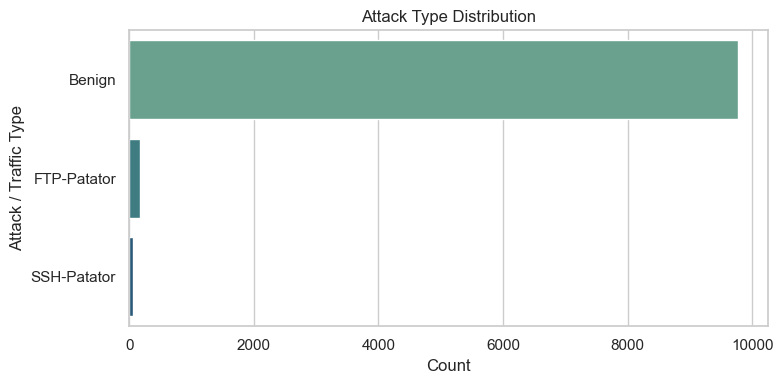

Label
Benign         97.67
FTP-Patator     1.68
SSH-Patator     0.65
Name: proportion, dtype: float64

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

label_col = 'Label'   # change this if your label column name is different

plt.figure(figsize=(8,4))
sns.countplot(y=label_col, data=sample, order=sample[label_col].value_counts().index, palette="crest")
plt.title('Attack Type Distribution')
plt.xlabel('Count')
plt.ylabel('Attack / Traffic Type')
plt.tight_layout()
plt.show()

sample[label_col].value_counts(normalize=True).mul(100).round(2)

Flow duration analysis

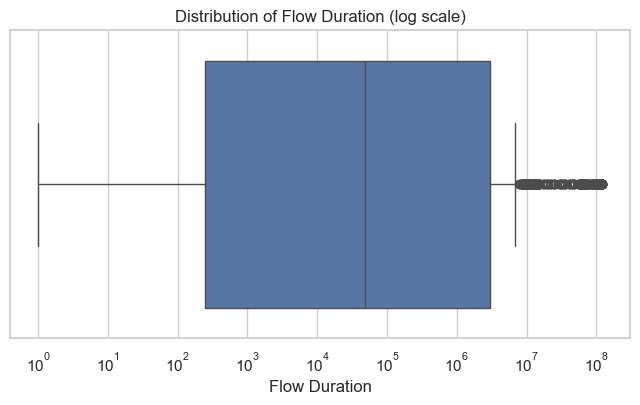

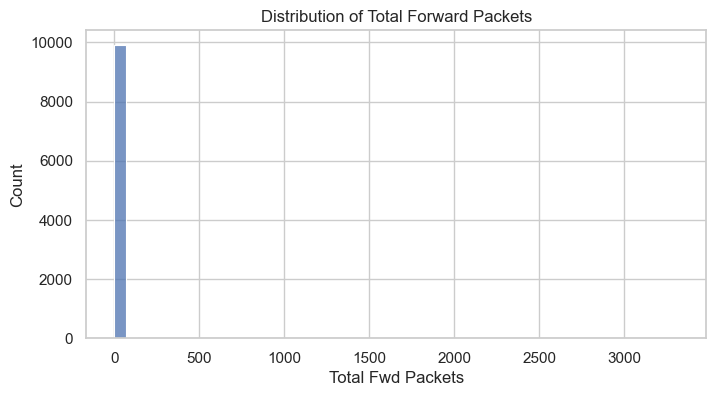

In [15]:
plt.figure(figsize=(8,4))
sns.boxplot(x='Flow Duration', data=sample.sample(n=min(2000, len(sample)), random_state=1))
plt.xscale('log')
plt.title('Distribution of Flow Duration (log scale)')
plt.show()

plt.figure(figsize=(8,4))
sns.histplot(sample['Total Fwd Packets'], bins=50)
plt.title('Distribution of Total Forward Packets')
plt.show()

Correlation Heatmap

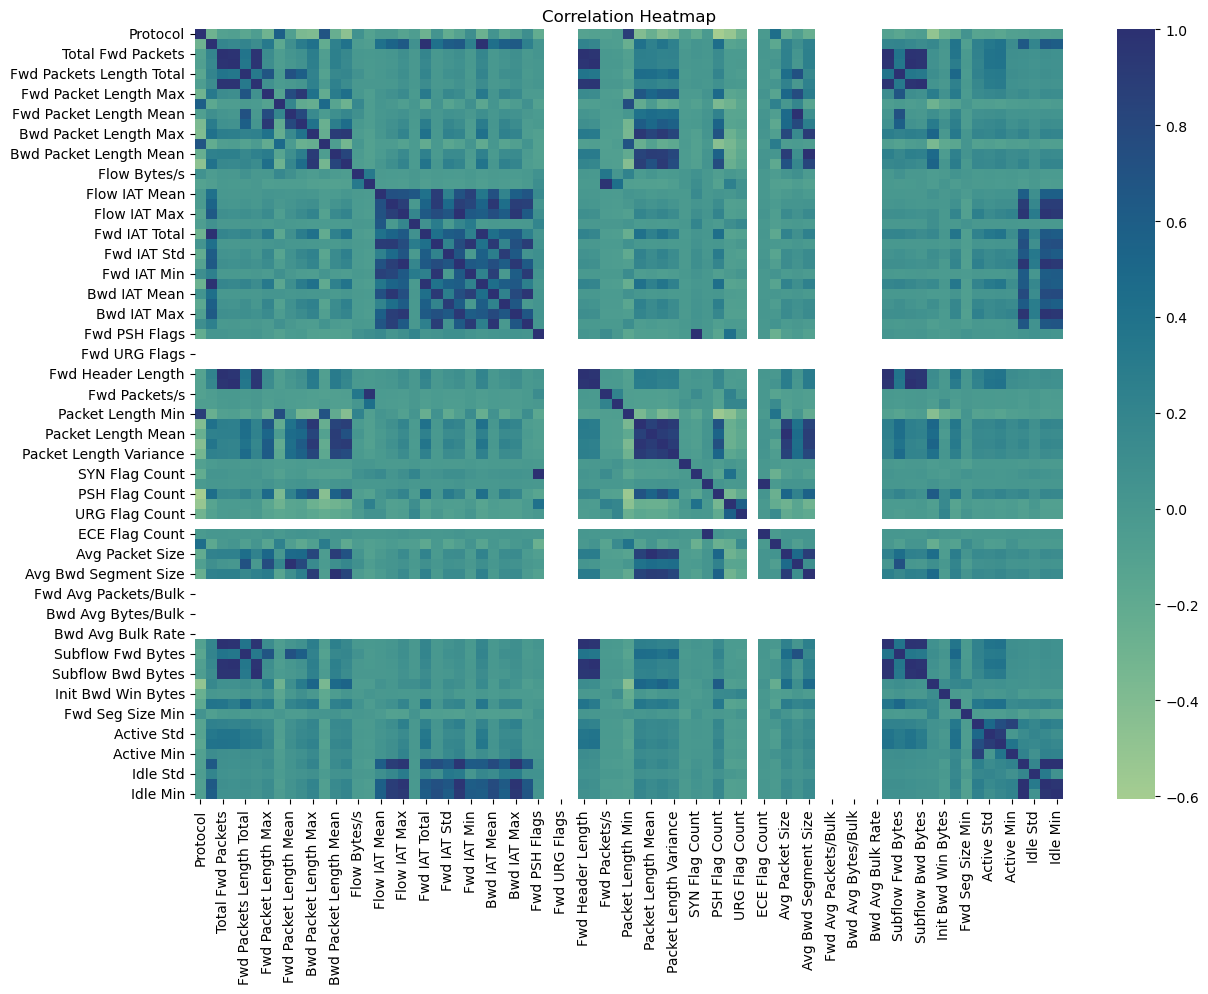

In [14]:
# Compute correlation matrix (top 20 features by variance)
sample = df.sample(10000, random_state=42)  # or any number <= len(df)

corr = sample.corr(numeric_only=True)
plt.figure(figsize=(14,10))
sns.heatmap(corr, cmap='crest')
plt.title("Correlation Heatmap")
plt.show()

Observations:
- The dataset contains 10,000 rows and 78 features related to network flow behavior.
- Major columns include Flow Duration, Packet counts, and various IAT/Flag indicators.
- The Label column identifies whether a flow is **Brute Force attack** or **Benign**.
- Attack flows typically show **shorter durations** and **higher packet intensity**.

In [17]:
# Step 1: Identify label / attack / class columns
[c for c in sample.columns if 'label' in c.lower() or 'attack' in c.lower() or 'class' in c.lower()]


['Label']

In [18]:
# Step 2: See what values exist in your label column
label_col = 'Label'   # change this to whatever name you found above
sample[label_col].value_counts()

Label
Benign         9767
FTP-Patator     168
SSH-Patator      65
Name: count, dtype: int64

In [19]:
# Show the last 15 column names — label is usually near the end
sample.columns[-15:]

Index(['Subflow Bwd Packets', 'Subflow Bwd Bytes', 'Init Fwd Win Bytes',
       'Init Bwd Win Bytes', 'Fwd Act Data Packets', 'Fwd Seg Size Min',
       'Active Mean', 'Active Std', 'Active Max', 'Active Min', 'Idle Mean',
       'Idle Std', 'Idle Max', 'Idle Min', 'Label'],
      dtype='object')

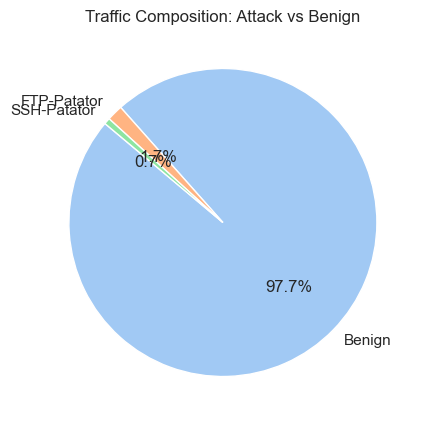

In [24]:
label_counts = sample['Label'].value_counts()
plt.figure(figsize=(5,5))
plt.pie(
    label_counts,
    labels=label_counts.index,
    autopct='%1.1f%%',
    startangle=140,
    colors=sns.color_palette("pastel")
)
plt.title('Traffic Composition: Attack vs Benign')
plt.show()


In [1]:
import pandas as pd

# Load the 10k sample we created earlier
df = pd.read_csv("../data/bruteforce_sample.csv")

print("✅ Data loaded successfully!")
print("Shape:", df.shape)
df.head()

✅ Data loaded successfully!
Shape: (10000, 78)


,Protocol,Flow Duration,Total Fwd Packets,Total Backward Packets,Fwd Packets Length Total,Bwd Packets Length Total,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,6,199130,5,7,4019,736,3451,0,803.80000,1495.728800,...,20,0.0,0.0,0,0,0.0,0.0,0,0,Benign
1,6,6058649,7,4,635,168,517,0,90.71429,190.707200,...,32,0.0,0.0,0,0,0.0,0.0,0,0,Benign
2,17,980,2,2,96,148,48,48,48.00000,0.000000,...,20,0.0,0.0,0,0,0.0,0.0,0,0,Benign
3,6,3548122,5,1,123,46,46,0,24.60000,23.276598,...,32,0.0,0.0,0,0,0.0,0.0,0,0,Benign
4,6,121,2,0,0,0,0,0,0.00000,0.000000,...,20,0.0,0.0,0,0,0.0,0.0,0,0,Benign


In [2]:
df.info()
missing = df.isnull().sum().sort_values(ascending=False)
display(missing[missing > 0].head(20))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 78 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Protocol                  10000 non-null  int64  
 1   Flow Duration             10000 non-null  int64  
 2   Total Fwd Packets         10000 non-null  int64  
 3   Total Backward Packets    10000 non-null  int64  
 4   Fwd Packets Length Total  10000 non-null  int64  
 5   Bwd Packets Length Total  10000 non-null  int64  
 6   Fwd Packet Length Max     10000 non-null  int64  
 7   Fwd Packet Length Min     10000 non-null  int64  
 8   Fwd Packet Length Mean    10000 non-null  float64
 9   Fwd Packet Length Std     10000 non-null  float64
 10  Bwd Packet Length Max     10000 non-null  int64  
 11  Bwd Packet Length Min     10000 non-null  int64  
 12  Bwd Packet Length Mean    10000 non-null  float64
 13  Bwd Packet Length Std     10000 non-null  float64
 14  Flow By

Series([], dtype: int64)

In [3]:
# 1) Make sure imports are present
import pandas as pd
import os

# 2) show files in the data folder so we confirm the filename
print("Files in data/:", os.listdir("../data"))

# 3) load the sample CSV into df (adjust name if needed)
csv_path = "../data/bruteforce_sample.csv"
if not os.path.exists(csv_path):
    raise FileNotFoundError(f"{csv_path} not found. Check ../data folder above and use the correct filename.")

df = pd.read_csv(csv_path)
print("✅ Loaded df with shape:", df.shape)

# 4) show label counts
print("\nLabel value counts:")
print(df['Label'].value_counts())


Files in data/: ['Benign-Monday-no-metadata.parquet', 'Botnet-Friday-no-metadata.parquet', 'Bruteforce-Tuesday-no-metadata.parquet', 'bruteforce_sample.csv', 'bruteforce_sample.parquet', 'DDoS-Friday-no-metadata.parquet', 'DoS-Wednesday-no-metadata.parquet', 'Infiltration-Thursday-no-metadata.parquet', 'Portscan-Friday-no-metadata.parquet', 'WebAttacks-Thursday-no-metadata.parquet']
✅ Loaded df with shape: (10000, 78)

Label value counts:
Label
Benign         9767
FTP-Patator     168
SSH-Patator      65
Name: count, dtype: int64


C:\Users\vidhi\AppData\Local\Temp\ipykernel_2936\3478864451.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(


<function matplotlib.pyplot.show(close=None, block=None)>

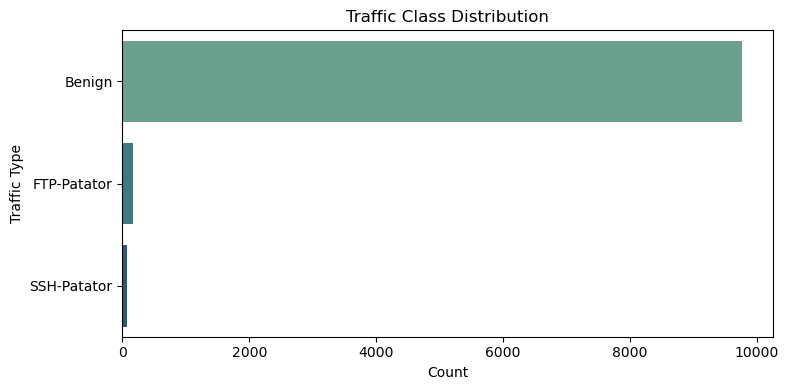

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,4))
sns.countplot(
    y='Label',
    data=df,
    order=df['Label'].value_counts().index,
    palette="crest"
)
plt.title('Traffic Class Distribution')
plt.xlabel('Count')
plt.ylabel('Traffic Type')
plt.tight_layout()
plt.show

### 🔍 Class Imbalance Observation
The dataset is highly imbalanced — the majority of flows are Benign (≈97%). The FTP-Patator and SSH-Patator attack classes represent rare events, consistent with real-world intrusion scenarios where malicious traffic is only a small fraction of total network activity.

C:\Users\vidhi\AppData\Local\Temp\ipykernel_2936\1906619503.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


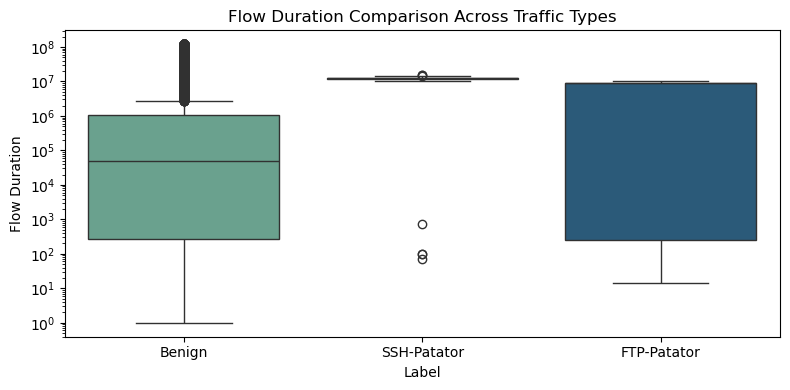

In [5]:
plt.figure(figsize=(8,4))
sns.boxplot(
    data=df,
    x='Label',
    y='Flow Duration',
    palette='crest'
)
plt.yscale('log')
plt.title('Flow Duration Comparison Across Traffic Types')
plt.tight_layout()
plt.show()

### 🔍 Flow Duration Insights
SSH-Patator flows appear to have higher flow durations compared to FTP-Patator. This suggests that SSH brute-force activity may involve longer-lived connection attempts, likely due to SSH’s heavier encryption and slower handshake process. FTP-Patator flows are shorter, indicating rapid login attempts. Benign traffic shows a wider spread in duration.

C:\Users\vidhi\AppData\Local\Temp\ipykernel_2936\1279100607.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


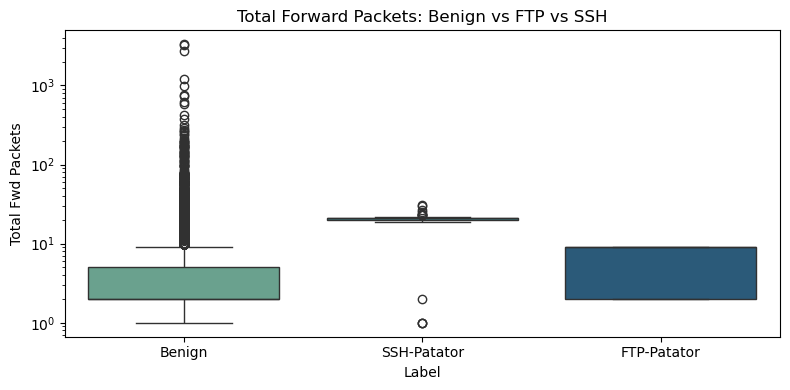

In [6]:
plt.figure(figsize=(8,4))
sns.boxplot(
    data=df,
    x='Label',
    y='Total Fwd Packets',
    palette='crest'
)
plt.yscale('log')
plt.title('Total Forward Packets: Benign vs FTP vs SSH')
plt.tight_layout()
plt.show()

### 🔍 Total Forward Packets — Insight
Benign traffic shows significantly higher and more variable forward packet counts compared to both FTP-Patator and SSH-Patator attacks. This suggests that normal flows involve a wider range of activity, whereas brute-force attacks send a smaller, more consistent number of packets. The attack classes have very tight distributions with fewer outliers.

C:\Users\vidhi\AppData\Local\Temp\ipykernel_2936\2966530515.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


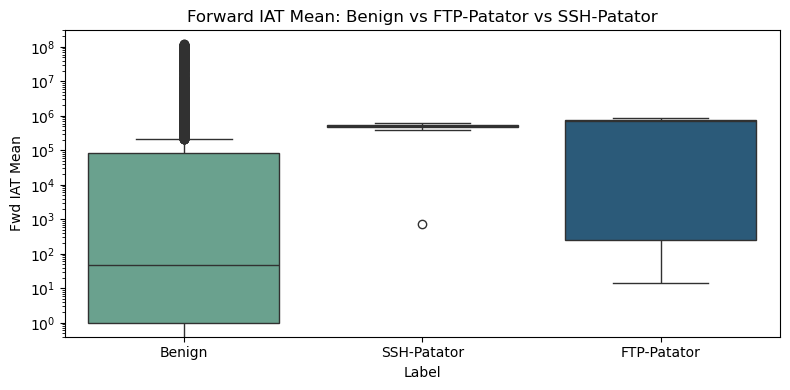

In [7]:
plt.figure(figsize=(8,4))
sns.boxplot(
    data=df,
    x='Label',
    y='Fwd IAT Mean',
    palette='crest'
)
plt.yscale('log')
plt.title('Forward IAT Mean: Benign vs FTP-Patator vs SSH-Patator')
plt.tight_layout()
plt.show()

### 🔍 Forward IAT Mean — Insight
FTP-Patator flows show significantly lower Forward IAT Mean values compared to Benign traffic. This indicates that FTP brute-force attacks generate packets in rapid succession, with minimal delay between them. Benign traffic exhibits higher and more variable IAT values, reflecting natural user behavior with pauses, browsing, and irregular activity.

C:\Users\vidhi\AppData\Local\Temp\ipykernel_2936\358925636.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


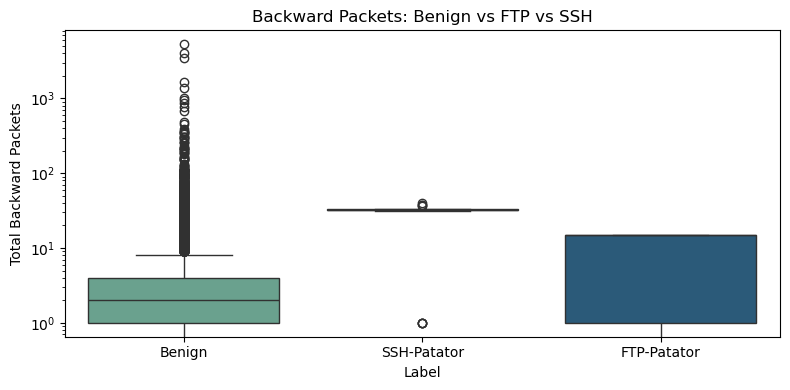

In [8]:
plt.figure(figsize=(8,4))
sns.boxplot(
    data=df,
    x='Label',
    y='Total Backward Packets',
    palette='crest'
)
plt.yscale('log')
plt.title('Backward Packets: Benign vs FTP vs SSH')
plt.tight_layout()
plt.show()


### 🔍 Backward Packets — Insight
SSH-Patator flows show the lowest number of backward packets, indicating that SSH brute-force attempts trigger very limited server responses. In contrast, Benign traffic has significantly higher and more variable backward packet counts, which is expected in normal user activity where servers respond with multiple data packets. This difference helps distinguish real traffic from brute-force attacks.


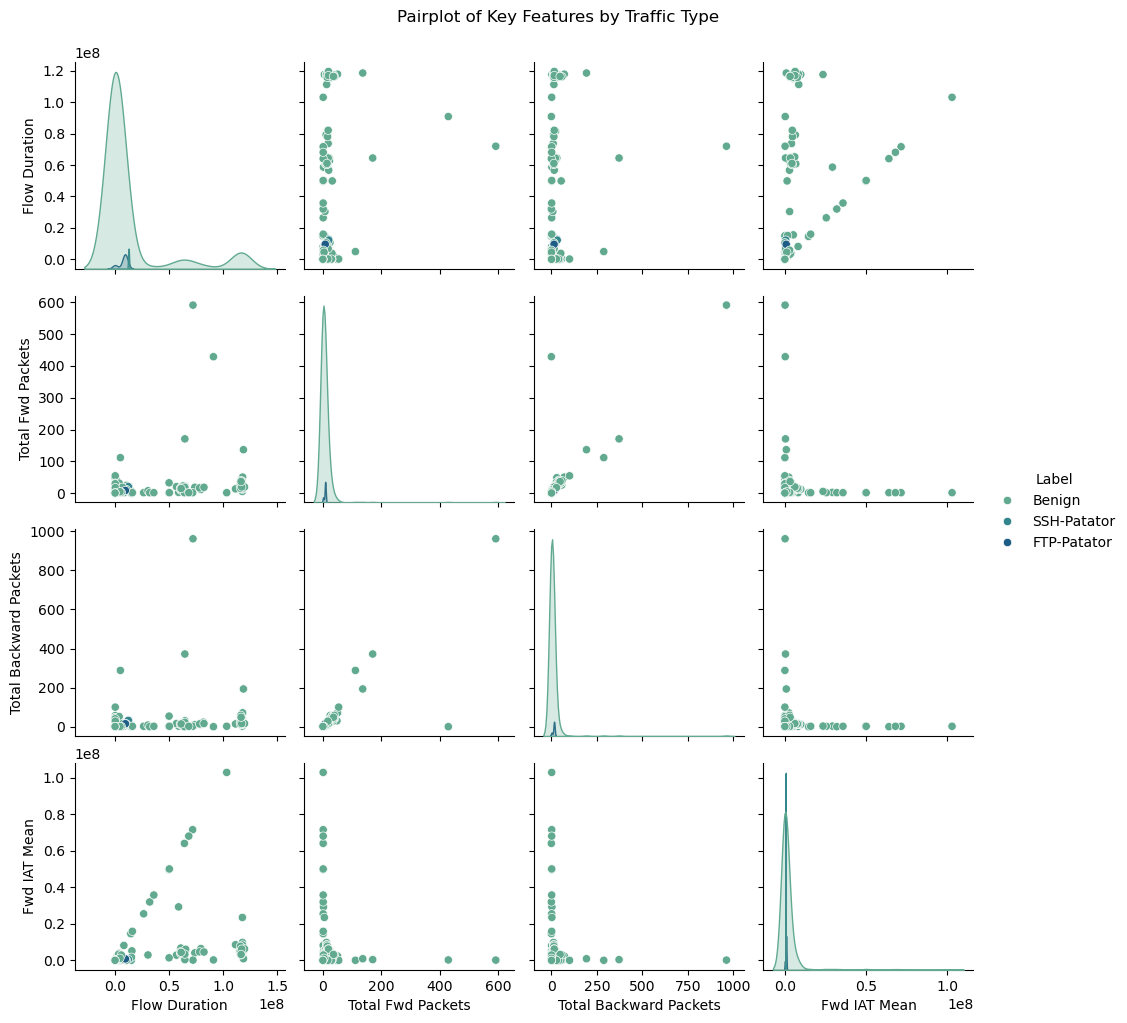

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select important features + label
pair_df = df[['Flow Duration', 
              'Total Fwd Packets', 
              'Total Backward Packets', 
              'Fwd IAT Mean', 
              'Label']]

# Take a smaller sample (pairplot becomes slow otherwise)
pair_df_sample = pair_df.sample(500, random_state=42)

sns.pairplot(pair_df_sample, hue='Label', diag_kind='kde', palette='crest')
plt.suptitle('Pairplot of Key Features by Traffic Type', y=1.02)
plt.show()

### 🔍 Pairplot — Multifeature Insights
The pairplot shows that Benign traffic is both significantly more frequent and widely scattered across all feature combinations. This indicates natural variability in normal user activity. In contrast, the FTP-Patator and SSH-Patator attack classes appear in small, tight clusters with limited spread, reflecting their repetitive, automated behavior during brute-force attempts. The separation in density also suggests that attack flows have more consistent patterns compared to highly variable benign traffic.


# 📌 Conclusion

This analysis shows clear behavioral differences between Benign traffic and brute-force attacks:

### **1. Class Imbalance**
Benign traffic dominates the dataset (~97%), while FTP-Patator and SSH-Patator appear as rare events – consistent with real-world intrusion scenarios.

### **2. Flow Duration**
SSH-Patator flows show longer durations than FTP-Patator, likely due to SSH’s slower handshake and encrypted communication.  
Benign flows display wide variation based on natural user activity.

### **3. Packet Patterns**
Benign traffic has significantly higher and more variable forward and backward packet counts.  
Brute-force attacks generate small, consistent packet volumes characteristic of automated attack scripts.

### **4. Timing Characteristics**
FTP-Patator exhibits the lowest Forward IAT Mean, meaning packets are sent rapidly with minimal delay – typical of brute-force attempts.  
Benign traffic displays more scattered timing due to natural human-driven interactions.

### **5. Multi-feature Behavior**
Pairplots show tight clustering for attack traffic and wide spread for Benign traffic, reinforcing that automated attacks are repetitive, while legitimate traffic is diverse.

---

Overall, this EDA demonstrates how simple network flow features can help distinguish benign and malicious traffic. These insights will support future work in **attack detection**, **feature engineering**, and **machine learning-based intrusion detection systems**.